<a href="https://colab.research.google.com/github/Rahul2661998/Cardekho-mini-project-/blob/main/Self_Project_Linear_Regression_(Car_Dekho).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## <b> CarDekho.com is India's leading car search venture that helps users buy cars that are right for them. Its website and app carry rich automotive content such as expert reviews, detailed specs and prices, comparisons as well as videos and pictures of all car brands and models available in India. The company has tie-ups with many auto manufacturers, more than 4000 car dealers and numerous financial institutions to facilitate the purchase of vehicles.

## <b> CarDekho.com has launched many innovative features to ensure that users get an immersive experience of the car model before visiting a dealer showroom. These include a Feel The Car tool that gives 360-degree interior/exterior views with sounds of the car and explanations of features with videos; search and comparison by make, model, price, features; and live offers and promotions in all cities. The platform also has used car classifieds wherein users can upload their cars for sale, and find used cars for buying from individuals and used car dealers.

## <b> Besides the above consumer product features, CarDekho.com provides a rich array of tech-enabled tools to OE manufacturers and car dealers. These include apps for dealer sales executives to manage leads, cloud services for tracking sales performance, call tracker solution, digital marketing support, virtual online showroom and outsourced lead management operational process for taking consumers from enquiry to sale.

## <b> Our vision is to construct a complete ecosystem for consumers and car manufacturers, dealers and related businesses such that consumers have easy and complete access to not only buying and selling cars, but also manage their entire ownership experience, be it accessories, tyres, batteries, insurance or roadside assistance. </b>

## <b>In this project, the dataset contains information about used cars listed on www.cardekho.com. This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.</b>

## <b>The columns in the given dataset are as follows:</b>

- ### name
- ### year
- ### selling_price
- ### km_driven
- ### fuel
- ### seller_type
- ### transmission
- ### Owner

## <b>Load up this dataset in the kernel and perform initial exploratory data analysis (EDA). You should also try creating new features based on the existing ones. The dependent variable is the <code>selling_price</code>. 

## <b> Your task is to build a linear regression model on this dataset (always split into train and test). Evaluate the fitted model on test data using different regression metrics. Also use your linear regression model from <code>statsmodels.api</code> to run a similar regression and obtain parameter inferences for each of the model variables. Next, you need to try if regularizing your model helps you perform well on the test dataset. For this, use <code> Ridge</code> and <code>Lasso</code> regressions on the dataset and check for different values of the tuning parameter ($\lambda$ or $\alpha$ , do not confuse this $\alpha$ with the learning rate.) For each of the above regressions, get the feature importances using the regression coefficients.

## <b><u> Few things to keep in mind :</u>
* ### You should take care of categorical variables (variables which take discrete categories or classes) and do one-hot encoding to be able to pass them into the model.
* ### Try to include as many plots and charts you can. This adds for a great visual interpretation of your tasks/activities.
* ### Write detailed explanation of your approaches in the notebook and once you have some results, try to provide explanations for these observed results. Remember our objective is not only to build a machine learning model but to be able to explain why, what and how of the entire modeling process.

#Define Libraries

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [58]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
data=pd.read_csv("/content/drive/MyDrive/Regression models/Copy of CAR DETAILS FROM CAR DEKHO.csv")

In [60]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [62]:
data.describe(include="all")

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
count,4340,4340.000000,4.340000e+03,4340.000000,4340,4340,4340,4340
unique,1491,NaN,NaN,NaN,5,3,2,5
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner
freq,69,NaN,NaN,NaN,2153,3244,3892,2832
mean,NaN,2013.090783,5.041273e+05,66215.777419,NaN,NaN,NaN,NaN
std,NaN,4.215344,5.785487e+05,46644.102194,NaN,NaN,NaN,NaN
min,NaN,1992.000000,2.000000e+04,1.000000,NaN,NaN,NaN,NaN
25%,NaN,2011.000000,2.087498e+05,35000.000000,NaN,NaN,NaN,NaN
50%,NaN,2014.000000,3.500000e+05,60000.000000,NaN,NaN,NaN,NaN
75%,NaN,2016.000000,6.000000e+05,90000.000000,NaN,NaN,NaN,NaN


#EDA

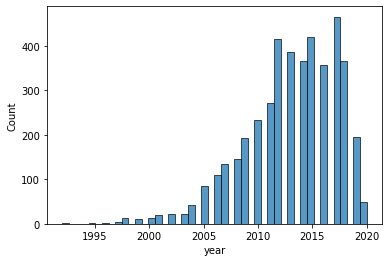

In [63]:
sns.histplot(data['year'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


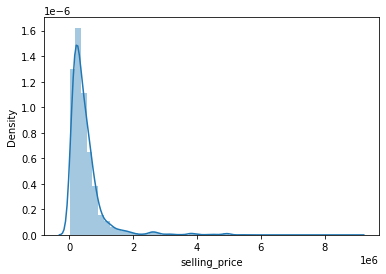

In [64]:
sns.distplot(data['selling_price'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


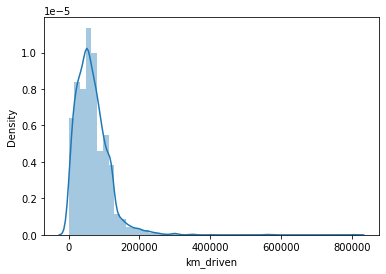

In [65]:
sns.distplot(data['km_driven'])
plt.show()

Bivariate Analysis

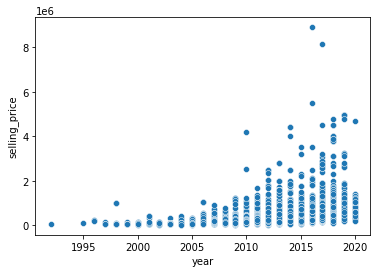

In [66]:
sns.scatterplot(x=data['year'],y=data['selling_price'])
plt.show()

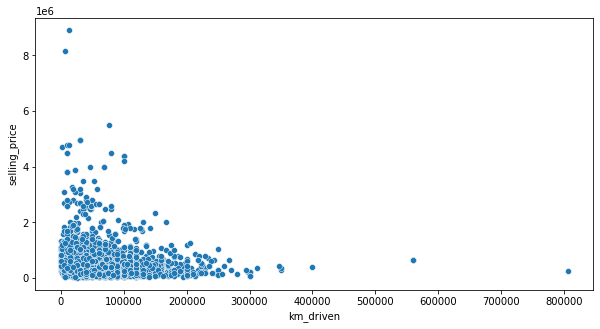

In [67]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=data['km_driven'],y=data['selling_price'])
plt.show()

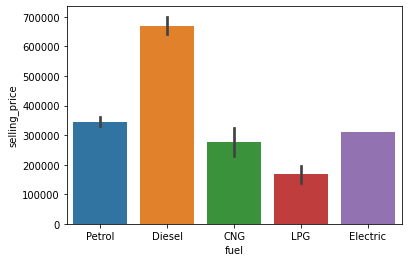

In [68]:
sns.barplot(x=data['fuel'],y=data['selling_price'])
plt.show()

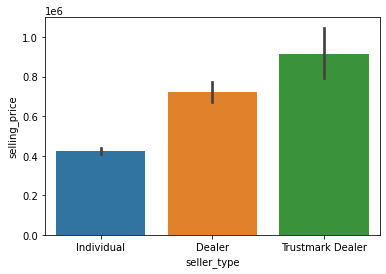

In [69]:
sns.barplot(x=data['seller_type'],y=data['selling_price'])
plt.show()

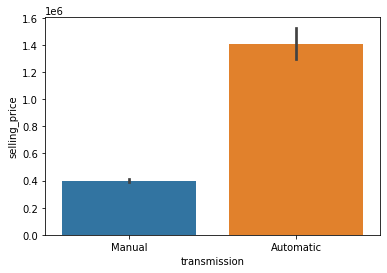

In [70]:
sns.barplot(x=data['transmission'],y=data['selling_price'])
plt.show()

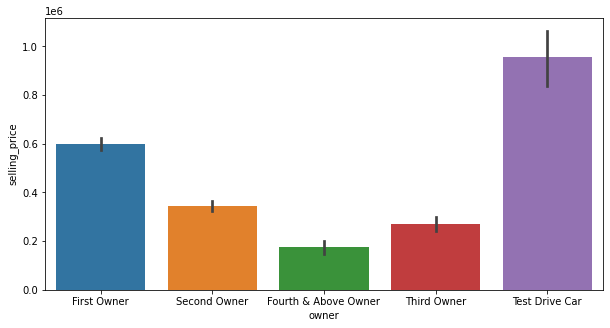

In [71]:
plt.figure(figsize=(10,5))
sns.barplot(x=data['owner'],y=data['selling_price'])
plt.show()

Data Preprocessing

linearity Check

After performing log Transformation on selling_price we have some linarity in data 

In [72]:
data["log_selling_price"]=np.log(data["selling_price"])

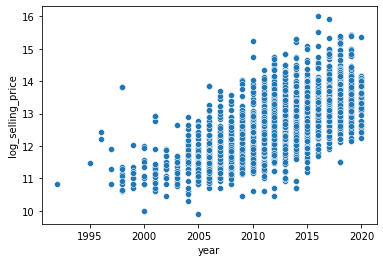

In [73]:
sns.scatterplot(x=data["year"],y=data["log_selling_price"])
plt.show()

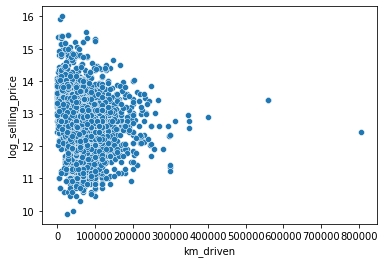

In [74]:
sns.scatterplot(x=data["km_driven"],y=data["log_selling_price"])
plt.show()

Outliears

In [75]:
q=data['year'].quantile(0.1)
data=data[data['year']>q]

In [76]:
p=data['log_selling_price'].quantile(0.95)
q=data['log_selling_price'].quantile(0.1)
data=data[(data['log_selling_price']<p) & (data['log_selling_price']>q)]

In [77]:
p=data['km_driven'].quantile(0.95)
q=data['km_driven'].quantile(0.1)
data=data[(data['km_driven']<p) & (data['km_driven']>q)]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


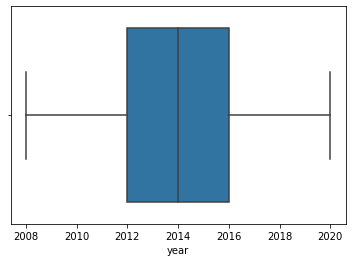

In [78]:
sns.boxplot(data["year"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


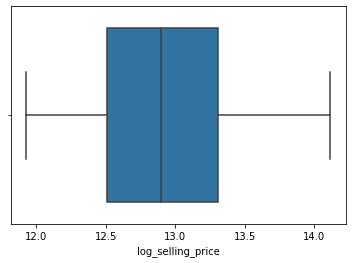

In [79]:
sns.boxplot(data["log_selling_price"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


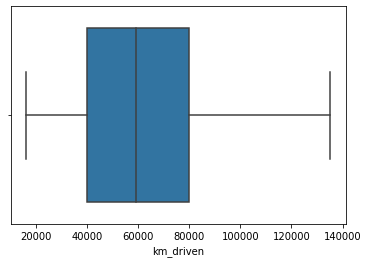

In [80]:
sns.boxplot(data["km_driven"])
plt.show()

Feature Selection

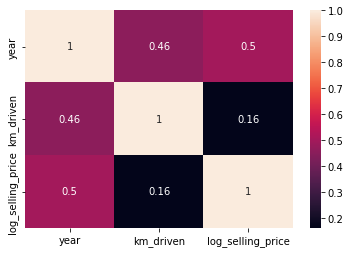

In [81]:
sns.heatmap(np.abs(data[["year","km_driven","log_selling_price"]].corr()),annot=True)

In [82]:
corr_test=data[['km_driven','log_selling_price']]

In [83]:
pd.DataFrame({'feature':corr_test.columns, 'VIF':[variance_inflation_factor(corr_test.values,i) for i in range(corr_test.shape[1])]})


,feature,VIF
0,km_driven,5.352954
1,log_selling_price,5.352954


Feature year is removed

Since year had high collinearity

In [84]:
data=data.drop(['selling_price','year','name'],axis=1)

In [85]:
data.head()

,km_driven,fuel,seller_type,transmission,owner,log_selling_price
2,100000,Diesel,Individual,Manual,First Owner,13.304685
3,46000,Petrol,Individual,Manual,First Owner,12.429216
6,25000,Petrol,Individual,Manual,First Owner,13.217674
7,60000,Petrol,Individual,Manual,Second Owner,12.388394
8,25000,Petrol,Individual,Manual,First Owner,13.652992


In [86]:
#data.groupby(['owner','seller_type'])['name'].count()

Dummy variables for catagorical variables


In [87]:
data=pd.get_dummies(data,drop_first=True)

In [88]:
data.shape

(2714, 12)

In [90]:
data.head()

,km_driven,log_selling_price,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
2,100000,13.304685,1,0,0,1,0,1,0,0,0,0
3,46000,12.429216,0,0,1,1,0,1,0,0,0,0
6,25000,13.217674,0,0,1,1,0,1,0,0,0,0
7,60000,12.388394,0,0,1,1,0,1,0,1,0,0
8,25000,13.652992,0,0,1,1,0,1,0,0,0,0


Defining Target and Predictors


In [92]:
target=data['log_selling_price']
input=data.drop(['log_selling_price'],axis=1)

Standardization
Mean 0 and variance of 1

In [93]:
scaler=StandardScaler()
scaler.fit(input)
input = scaler.transform(input)

Splitting dataset into test and train

In [97]:
x_train,x_test,y_train,y_test=train_test_split(input,target, test_size=0.2,random_state=42)

Linear regression model

In [98]:
reg=LinearRegression()
reg.fit(x_train,y_train)


LinearRegression()

In [99]:
yhat=reg.predict(x_test)

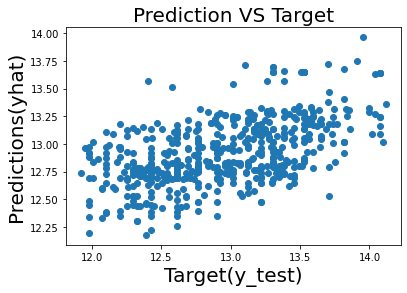

In [100]:
plt.scatter(y_test,yhat)
plt.xlabel('Target(y_test)',fontsize=20)
plt.ylabel('Predictions(yhat)',fontsize=20)
plt.title('Prediction VS Target',fontsize=20)
plt.show()

In [105]:
reg.score(x_train,y_train)

0.33268414859090545

In [103]:
reg.coef_

array([-1.28183017e-01,  2.57983152e-01, -1.52384136e-02,  1.52282614e-02,
       -8.67543050e-03,  6.57335421e-02, -1.23455932e-01, -2.95039909e-02,
       -5.22383457e-02,  1.00995396e-29, -5.00109604e-02])

In [104]:
reg.intercept_

12.917240403575232

Doing Same with Stats Models

In [141]:
x=sm.add_constant(x_train)
reg_stat=sm.OLS(y_train,x)
reg_stat.fit()
reg_stat.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      log_selling_price   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     107.7
Date:                Sun, 02 Oct 2022   Prob (F-statistic):          1.34e-181
Time:                        21:06:04   Log-Likelihood:                -1190.9
No. Observations:                2171   AIC:                             2404.
Df Residuals:                    2160   BIC:                             2466.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1282      0.010    -12.273      0.000      -0.149      -0.108
x2             0.2580      0.050      5.195      0.000       0.161       0.355
x3            -0.0152      0.011     -1.331      0.183      -0.038       0.007
x4             0.0152      0.050      0.306      0.759      -0.082       0.113
x5            -0.0087      0.010     -0.886      0.376      -0.028       0.011
x6             0.0657      0.009      6.923      0.000       0.047       0.084
x7            -0.1235      0.009    -13.525      0.000      -0.141      -0.106
x8            -0.0295      0.009     -3.335      0.001      -0.047      -0.012
x9            -0.0522      0.010     -5.384      0.000      -0.071      -0.033
x10         -672.8134      0.470  -1432.975      0.000    -673.734    -671.893
x11           -0.0500      0.009     -5.417      0.000      -0.068      -0.032
==============================================================================
Omnibus:                        6.898   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.032   Jarque-Bera (JB):                5.814
Skew:                           0.049   Prob(JB):                       0.0547
Kurtosis:                       2.766   Cond. No.                         78.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Applying Lasso Regression to check Overfitting


In [122]:
reg_lasso=Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(reg_lasso, parameters, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.769e-01, tolerance: 3.719e-02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.483e-02, tolerance: 3.896e-02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [124]:
lasso_regressor.score(x_train,y_train)

-0.1754029924827246

In [137]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.001}

Using  {'alpha': 0.001}  the negative mean squared error is:  -0.17816598824795404


In [129]:
yhat_l=lasso_regressor.predict(x_test)

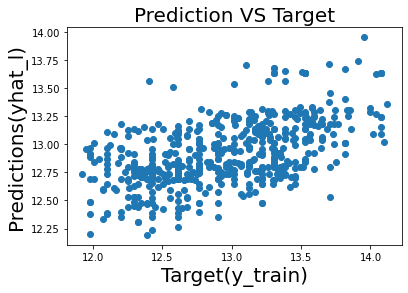

In [130]:
plt.scatter(y_test,yhat_l)
plt.xlabel('Target(y_train)',fontsize=20)
plt.ylabel('Predictions(yhat_l)',fontsize=20)
plt.title('Prediction VS Target',fontsize=20)
plt.show()

In [131]:
# Hyperprarameter tuning
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.6155e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.73694e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.58773e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.77747e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [132]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-15}

Using  {'alpha': 1e-15}  the negative mean squared error is:  -0.17818419235151786


In [134]:
#Model Prediction
y_pred_ridge = ridge_regressor.predict(x_test)

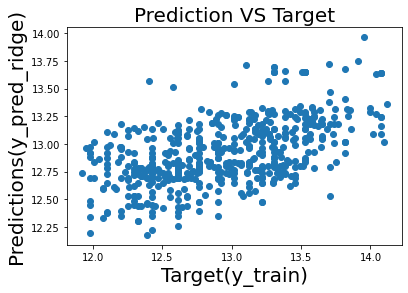

In [135]:
plt.scatter(y_test,y_pred_ridge)
plt.xlabel('Target(y_train)',fontsize=20)
plt.ylabel('Predictions(y_pred_ridge)',fontsize=20)
plt.title('Prediction VS Target',fontsize=20)
plt.show()